In [1]:
import numpy as np
from scipy.interpolate import interp1d as interp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from thunderflask import thunderflask
from bacteria import strain
from ffgen import ffgen
from codonTable import codonTable
from codonUtils import utils
from bacteria import strain
from ffgen import ffgen
import pickle
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cProfile

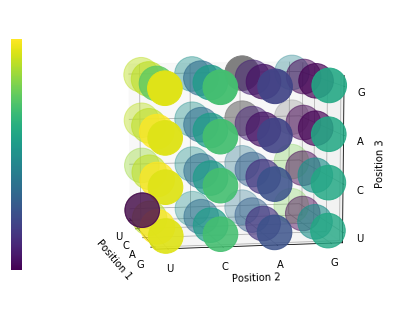

Iteration Number:   8%|▊         | 843/10050 [00:13<02:25, 63.20it/s]


Iteration Number:  12%|█▏        | 1238/10050 [00:27<03:14, 45.21it/s]


Iteration Number:  23%|██▎       | 2338/10050 [00:40<02:12, 58.36it/s]


Iteration Number:  30%|███       | 3020/10050 [00:52<02:02, 57.16it/s]


Iteration Number:  39%|███▉      | 3916/10050 [01:05<01:42, 59.89it/s]


Iteration Number:  44%|████▎     | 4387/10050 [01:18<01:41, 55.92it/s]


Iteration Number:  51%|█████     | 5079/10050 [01:31<01:29, 55.34it/s]


Iteration Number:  57%|█████▋    | 5755/10050 [01:44<01:18, 54.87it/s]


Iteration Number:  65%|██████▍   | 6492/10050 [01:57<01:04, 55.16it/s]


Iteration Number:  69%|██████▉   | 6984/10050 [02:11<00:57, 53.19it/s]


Iteration Number:  74%|███████▎  | 7392/10050 [02:25<00:52, 50.89it/s]


Iteration Number:  82%|████████▏ | 8206/10050 [02:37<00:35, 51.95it/s]


Iteration Number:  86%|████████▌ | 8600/10050 [02:51<00:28, 50.08it/s]


Iteration Number:  90%|████████▉ | 9002/10050 [03:05<00:21, 48.54it/s]


Iteration Number:  96%|█████████▌| 9621/10050 [03:18<00:08, 48.35it/s]


Iteration Number:   2%|▏         | 243/10050 [00:01<00:44, 220.52it/s]


Iteration Number:   7%|▋         | 726/10050 [00:16<03:26, 45.10it/s]


Iteration Number:  10%|█         | 1052/10050 [00:30<04:23, 34.10it/s]


Iteration Number:  14%|█▍        | 1406/10050 [00:44<04:36, 31.29it/s]


Iteration Number:  22%|██▏       | 2257/10050 [00:58<03:20, 38.84it/s]


Iteration Number:  26%|██▋       | 2659/10050 [01:11<03:18, 37.15it/s]


Iteration Number:  34%|███▍      | 3419/10050 [01:24<02:43, 40.48it/s]


Iteration Number:  40%|████      | 4067/10050 [01:37<02:23, 41.82it/s]


Iteration Number:  48%|████▊     | 4857/10050 [01:50<01:57, 44.07it/s]


Iteration Number:  57%|█████▋    | 5714/10050 [02:04<01:34, 45.98it/s]


Iteration Number:  65%|██████▍   | 6509/10050 [02:17<01:15, 47.20it/s]


Iteration Number:  73%|███████▎  | 7321/10050 [02:30<00:56, 48.51it/s]


Iteration Number:  76%|███████▌  | 7659/10050 [02:45<00:51, 46.37it/s]


Iteration Number:  84%|████████▎ | 8397/10050 [02:58<00:35, 47.13it/s]


Iteration Number:  87%|████████▋ | 8766/10050 [03:11<00:28, 45.78it/s]


Iteration Number:  95%|█████████▍| 9538/10050 [03:23<00:10, 46.81it/s]


Iteration Number:   6%|▌         | 620/10050 [00:06<01:32, 101.62it/s]


Iteration Number:  12%|█▏        | 1241/10050 [00:18<02:13, 65.76it/s]


Iteration Number:  22%|██▏       | 2172/10050 [00:31<01:55, 68.26it/s]


Iteration Number:  30%|██▉       | 3002/10050 [00:44<01:43, 67.97it/s]


Iteration Number:  39%|███▉      | 3960/10050 [00:56<01:27, 69.55it/s]


Iteration Number:  44%|████▍     | 4431/10050 [01:09<01:28, 63.44it/s]


Iteration Number:  53%|█████▎    | 5351/10050 [01:22<01:12, 65.09it/s]


Iteration Number:  61%|██████    | 6153/10050 [01:36<01:00, 63.95it/s]


Iteration Number:  66%|██████▌   | 6600/10050 [01:50<00:57, 59.85it/s]


Iteration Number:  69%|██████▉   | 6971/10050 [02:04<00:55, 55.90it/s]


Iteration Number:  74%|███████▍  | 7449/10050 [02:19<00:48, 53.47it/s]


Iteration Number:  79%|███████▉  | 7988/10050 [02:31<00:39, 52.56it/s]


Iteration Number:  86%|████████▌ | 8596/10050 [02:45<00:27, 52.09it/s]


Iteration Number:  89%|████████▉ | 8936/10050 [02:58<00:22, 50.10it/s]


Iteration Number:  93%|█████████▎| 9354/10050 [03:11<00:14, 48.92it/s]


Iteration Number:  99%|█████████▉| 9968/10050 [03:23<00:01, 48.89it/s]


Iteration Number:   8%|▊         | 793/10050 [00:10<02:07, 72.60it/s]


Iteration Number:  16%|█▌        | 1625/10050 [00:23<02:03, 68.05it/s]


Iteration Number:  25%|██▌       | 2549/10050 [00:36<01:47, 69.70it/s]


Iteration Number:  31%|███       | 3077/10050 [00:49<01:51, 62.79it/s]


Iteration Number:  41%|████      | 4132/10050 [01:01<01:28, 66.84it/s]


Iteration Number:  50%|█████     | 5064/10050 [01:14<01:13, 68.21it/s]


Iteration Number:  60%|██████    | 6046/10050 [01:26<00:57, 69.92it/s]


Iteration Number:  64%|██████▍   | 6478/10050 [01:39<00:55, 64.83it/s]


Iteration Number:  70%|██████▉   | 6993/10050 [01:52<00:49, 62.21it/s]


Iteration Number:  78%|███████▊  | 7826/10050 [02:04<00:35, 62.66it/s]


Iteration Number:  82%|████████▏ | 8224/10050 [02:18<00:30, 59.46it/s]


Iteration Number:  89%|████████▊ | 8895/10050 [02:30<00:19, 58.96it/s]


Iteration Number:  94%|█████████▎| 9403/10050 [02:43<00:11, 57.39it/s]


Iteration Number:  98%|█████████▊| 9848/10050 [02:56<00:03, 55.68it/s]


Iteration Number:   7%|▋         | 730/10050 [00:08<01:52, 83.15it/s]


Iteration Number:  11%|█▏        | 1153/10050 [00:22<02:52, 51.62it/s]


Iteration Number:  18%|█▊        | 1781/10050 [00:35<02:44, 50.23it/s]


Iteration Number:  24%|██▍       | 2417/10050 [00:48<02:32, 50.11it/s]


Iteration Number:  32%|███▏      | 3188/10050 [01:00<02:10, 52.52it/s]


Iteration Number:  38%|███▊      | 3833/10050 [01:13<01:58, 52.29it/s]


Iteration Number:  46%|████▋     | 4662/10050 [01:25<01:39, 54.33it/s]


Iteration Number:  55%|█████▌    | 5549/10050 [01:38<01:19, 56.29it/s]


Iteration Number:  60%|█████▉    | 5992/10050 [01:51<01:15, 53.51it/s]


Iteration Number:  63%|██████▎   | 6368/10050 [02:05<01:12, 50.85it/s]


Iteration Number:  73%|███████▎  | 7308/10050 [02:17<00:51, 53.07it/s]


Iteration Number:  80%|████████  | 8051/10050 [02:30<00:37, 53.54it/s]


Iteration Number:  84%|████████▍ | 8476/10050 [02:43<00:30, 51.92it/s]


Iteration Number:  92%|█████████▏| 9231/10050 [02:55<00:15, 52.48it/s]


Iteration Number:  95%|█████████▍| 9528/10050 [03:09<00:10, 50.27it/s]


Iteration Number:  97%|█████████▋| 9748/10050 [03:24<00:06, 47.74it/s]


Iteration Number:   1%|▏         | 142/10050 [00:00<00:21, 460.92it/s]


Iteration Number:   8%|▊         | 818/10050 [00:13<02:37, 58.43it/s]


Iteration Number:  12%|█▏        | 1228/10050 [00:27<03:15, 45.12it/s]


Iteration Number:  21%|██▏       | 2156/10050 [00:39<02:25, 54.31it/s]


Iteration Number:  27%|██▋       | 2722/10050 [00:52<02:20, 51.98it/s]


Iteration Number:  34%|███▍      | 3443/10050 [01:05<02:04, 52.92it/s]


Iteration Number:  42%|████▏     | 4200/10050 [01:17<01:47, 54.24it/s]


Iteration Number:  49%|████▊     | 4890/10050 [01:30<01:35, 54.21it/s]


Iteration Number:  55%|█████▌    | 5563/10050 [01:43<01:23, 53.93it/s]


Iteration Number:  59%|█████▉    | 5934/10050 [01:56<01:20, 50.97it/s]


Iteration Number:  64%|██████▍   | 6482/10050 [02:08<01:11, 50.25it/s]


Iteration Number:  70%|███████   | 7052/10050 [02:22<01:00, 49.63it/s]


Iteration Number:  75%|███████▌  | 7576/10050 [02:34<00:50, 48.98it/s]


Iteration Number:  83%|████████▎ | 8295/10050 [02:47<00:35, 49.63it/s]


Iteration Number:  88%|████████▊ | 8821/10050 [03:00<00:25, 48.98it/s]


Iteration Number:  91%|█████████ | 9158/10050 [03:13<00:18, 47.27it/s]


Iteration Number:  95%|█████████▌| 9590/10050 [03:27<00:09, 46.30it/s]


Iteration Number:   6%|▋         | 638/10050 [00:07<01:44, 90.50it/s]


Iteration Number:  16%|█▌        | 1604/10050 [00:20<01:45, 79.80it/s]


Iteration Number:  21%|██▏       | 2157/10050 [00:32<02:00, 65.61it/s]


Iteration Number:  33%|███▎      | 3285/10050 [00:45<01:33, 72.29it/s]


Iteration Number:  36%|███▋      | 3649/10050 [00:59<01:43, 61.56it/s]


Iteration Number:  40%|███▉      | 3986/10050 [01:13<01:51, 54.58it/s]


Iteration Number:  47%|████▋     | 4729/10050 [01:25<01:36, 55.28it/s]


Iteration Number:  55%|█████▌    | 5536/10050 [01:37<01:19, 56.54it/s]


Iteration Number:  60%|█████▉    | 6005/10050 [01:51<01:14, 54.08it/s]


Iteration Number:  65%|██████▍   | 6494/10050 [02:03<01:07, 52.44it/s]


Iteration Number:  71%|███████   | 7140/10050 [02:16<00:55, 52.39it/s]


Iteration Number:  78%|███████▊  | 7794/10050 [02:28<00:43, 52.32it/s]


Iteration Number:  81%|████████▏ | 8168/10050 [02:42<00:37, 50.32it/s]


Iteration Number:  85%|████████▌ | 8589/10050 [02:55<00:29, 48.91it/s]


Iteration Number:  92%|█████████▏| 9203/10050 [03:08<00:17, 48.80it/s]


Iteration Number:  95%|█████████▍| 9506/10050 [03:21<00:11, 47.10it/s]


Iteration Number:  97%|█████████▋| 9726/10050 [03:35<00:07, 45.15it/s]


Iteration Number:  99%|█████████▉| 9980/10050 [03:48<00:01, 43.60it/s]


Iteration Number:   7%|▋         | 715/10050 [00:10<02:21, 65.80it/s]


Iteration Number:  12%|█▏        | 1197/10050 [00:24<02:58, 49.64it/s]


Iteration Number:  21%|██        | 2121/10050 [00:36<02:16, 58.06it/s]


Iteration Number:  26%|██▋       | 2647/10050 [00:49<02:17, 53.91it/s]


Iteration Number:  34%|███▍      | 3434/10050 [01:01<01:58, 55.70it/s]


Iteration Number:  40%|████      | 4043/10050 [01:14<01:50, 54.60it/s]


Iteration Number:  49%|████▉     | 4955/10050 [01:26<01:28, 57.35it/s]


Iteration Number:  55%|█████▌    | 5565/10050 [01:38<01:19, 56.32it/s]


Iteration Number:  61%|██████    | 6110/10050 [01:51<01:12, 54.57it/s]


Iteration Number:  65%|██████▍   | 6520/10050 [02:04<01:07, 52.18it/s]


Iteration Number:  72%|███████▏  | 7248/10050 [02:17<00:53, 52.77it/s]


Iteration Number:  79%|███████▊  | 7893/10050 [02:29<00:40, 52.64it/s]


Iteration Number:  85%|████████▌ | 8570/10050 [02:42<00:28, 52.76it/s]


Iteration Number:  91%|█████████ | 9132/10050 [02:55<00:17, 52.18it/s]


Iteration Number:  99%|█████████▊| 9921/10050 [03:07<00:02, 52.94it/s]


Iteration Number:   6%|▋         | 653/10050 [00:10<02:35, 60.36it/s]


Iteration Number:  10%|█         | 1024/10050 [00:25<03:42, 40.63it/s]


Iteration Number:  17%|█▋        | 1745/10050 [00:38<03:04, 45.01it/s]


Iteration Number:  22%|██▏       | 2182/10050 [00:52<03:07, 41.86it/s]


Iteration Number:  27%|██▋       | 2739/10050 [01:04<02:52, 42.26it/s]


Iteration Number:  34%|███▍      | 3402/10050 [01:17<02:31, 43.78it/s]


Iteration Number:  42%|████▏     | 4234/10050 [01:30<02:03, 46.92it/s]


Iteration Number:  50%|█████     | 5059/10050 [01:42<01:41, 49.37it/s]


Iteration Number:  55%|█████▌    | 5535/10050 [01:55<01:33, 48.06it/s]


Iteration Number:  59%|█████▉    | 5909/10050 [02:08<01:30, 46.00it/s]


Iteration Number:  62%|██████▏   | 6270/10050 [02:22<01:25, 44.13it/s]


Iteration Number:  70%|██████▉   | 6999/10050 [02:34<01:07, 45.30it/s]


Iteration Number:  74%|███████▍  | 7470/10050 [02:47<00:57, 44.57it/s]


Iteration Number:  82%|████████▏ | 8251/10050 [03:00<00:39, 45.81it/s]


Iteration Number:  90%|████████▉ | 9034/10050 [03:12<00:21, 46.83it/s]


Iteration Number:  95%|█████████▍| 9504/10050 [03:26<00:11, 46.05it/s]


Iteration Number:  98%|█████████▊| 9891/10050 [03:39<00:03, 45.05it/s]


Iteration Number:   7%|▋         | 674/10050 [00:07<01:45, 89.18it/s]


Iteration Number:  11%|█▏        | 1143/10050 [00:20<02:38, 56.06it/s]


Iteration Number:  19%|█▉        | 1954/10050 [00:33<02:17, 58.94it/s]


Iteration Number:  24%|██▍       | 2459/10050 [00:45<02:21, 53.65it/s]


Iteration Number:  32%|███▏      | 3228/10050 [00:58<02:03, 55.33it/s]


Iteration Number:  36%|███▋      | 3650/10050 [01:11<02:05, 51.20it/s]


Iteration Number:  43%|████▎     | 4352/10050 [01:23<01:49, 52.13it/s]


Iteration Number:  49%|████▉     | 4927/10050 [01:36<01:40, 50.99it/s]


Iteration Number:  55%|█████▍    | 5516/10050 [01:49<01:29, 50.48it/s]


Iteration Number:  62%|██████▏   | 6268/10050 [02:01<01:13, 51.45it/s]


Iteration Number:  71%|███████   | 7142/10050 [02:14<00:54, 53.04it/s]


Iteration Number:  77%|███████▋  | 7760/10050 [02:27<00:43, 52.75it/s]


Iteration Number:  84%|████████▍ | 8492/10050 [02:40<00:29, 53.07it/s]


Iteration Number:  89%|████████▉ | 8993/10050 [02:52<00:20, 52.10it/s]


Iteration Number:  97%|█████████▋| 9754/10050 [03:04<00:05, 52.75it/s]


Simulation Number: 100%|██████████| 10/10 [34:35<00:00, 207.53s/it]t/s]
/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


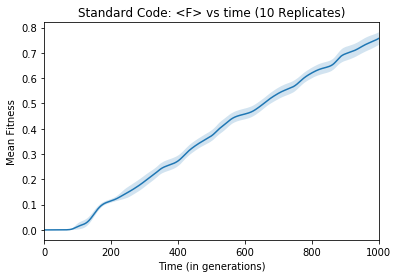

done


In [2]:
table = codonTable()
table.plot3d()
# populate sim
LUCA = strain(N_pop=1e6, table = table, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1
N_sims = 10
T_sim = 1000
t_extra = 5
date = '2-22'
code = 'Standard Code'
filepath = 'res/2-14 Traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=table, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

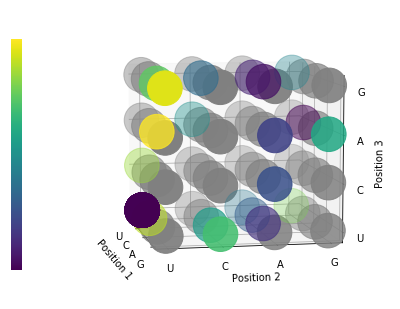

Iteration Number:   8%|▊         | 787/10050 [00:13<02:41, 57.47it/s]


Iteration Number:  16%|█▌        | 1582/10050 [00:26<02:21, 59.89it/s]


Iteration Number:  20%|██        | 2020/10050 [00:39<02:37, 51.00it/s]


Iteration Number:  23%|██▎       | 2350/10050 [00:53<02:55, 43.93it/s]


Iteration Number:  28%|██▊       | 2862/10050 [01:06<02:47, 42.91it/s]


Iteration Number:  36%|███▌      | 3569/10050 [01:19<02:24, 44.87it/s]


Iteration Number:  43%|████▎     | 4347/10050 [01:32<02:01, 46.99it/s]


Iteration Number:  47%|████▋     | 4713/10050 [01:45<01:59, 44.51it/s]


Iteration Number:  51%|█████     | 5130/10050 [01:59<01:54, 43.00it/s]


Iteration Number:  60%|██████    | 6048/10050 [02:11<01:27, 45.85it/s]


Iteration Number:  69%|██████▉   | 6934/10050 [02:24<01:04, 48.08it/s]


Iteration Number:  78%|███████▊  | 7793/10050 [02:37<00:45, 49.60it/s]


Iteration Number:  86%|████████▌ | 8647/10050 [02:49<00:27, 50.93it/s]


Iteration Number:  90%|████████▉ | 9024/10050 [03:03<00:20, 49.26it/s]


Iteration Number:  94%|█████████▎| 9412/10050 [03:16<00:13, 47.98it/s]


Iteration Number:   4%|▍         | 406/10050 [00:02<01:07, 143.59it/s]


Iteration Number:   9%|▉         | 910/10050 [00:16<02:41, 56.55it/s]


Iteration Number:  19%|█▉        | 1926/10050 [00:28<02:01, 66.99it/s]


Iteration Number:  30%|███       | 3050/10050 [00:41<01:35, 73.53it/s]


Iteration Number:  39%|███▉      | 3951/10050 [00:53<01:23, 73.23it/s]


Iteration Number:  46%|████▋     | 4671/10050 [01:06<01:16, 70.07it/s]


Iteration Number:  52%|█████▏    | 5229/10050 [01:19<01:13, 66.01it/s]


Iteration Number:  61%|██████▏   | 6175/10050 [01:31<00:57, 67.35it/s]


Iteration Number:  66%|██████▌   | 6607/10050 [01:44<00:54, 63.03it/s]


Iteration Number:  74%|███████▍  | 7460/10050 [01:57<00:40, 63.44it/s]


Iteration Number:  79%|███████▉  | 7924/10050 [02:10<00:35, 60.62it/s]


Iteration Number:  86%|████████▋ | 8678/10050 [02:23<00:22, 60.59it/s]


Iteration Number:  91%|█████████ | 9120/10050 [02:36<00:15, 58.39it/s]


Iteration Number:  98%|█████████▊| 9826/10050 [02:48<00:03, 58.30it/s]


Iteration Number:   6%|▌         | 607/10050 [00:08<02:19, 67.86it/s]


Iteration Number:  18%|█▊        | 1791/10050 [00:21<01:40, 82.38it/s]


Iteration Number:  27%|██▋       | 2746/10050 [00:34<01:33, 78.51it/s]


Iteration Number:  36%|███▌      | 3617/10050 [00:47<01:24, 76.11it/s]


Iteration Number:  43%|████▎     | 4365/10050 [01:00<01:18, 72.49it/s]


Iteration Number:  47%|████▋     | 4761/10050 [01:13<01:21, 64.88it/s]


Iteration Number:  55%|█████▌    | 5555/10050 [01:26<01:09, 64.59it/s]


Iteration Number:  60%|█████▉    | 5996/10050 [01:39<01:07, 60.45it/s]


Iteration Number:  68%|██████▊   | 6882/10050 [01:51<00:51, 61.80it/s]


Iteration Number:  79%|███████▉  | 7958/10050 [02:03<00:32, 64.24it/s]


Iteration Number:  88%|████████▊ | 8873/10050 [02:16<00:18, 65.10it/s]


Iteration Number:  94%|█████████▍| 9438/10050 [02:29<00:09, 63.27it/s]


Iteration Number:   4%|▍         | 378/10050 [00:02<00:55, 172.84it/s]


Iteration Number:  13%|█▎        | 1282/10050 [00:15<01:46, 82.32it/s]


Iteration Number:  18%|█▊        | 1840/10050 [00:28<02:08, 63.98it/s]


Iteration Number:  26%|██▌       | 2563/10050 [00:41<02:00, 62.38it/s]


Iteration Number:  32%|███▏      | 3168/10050 [00:54<01:57, 58.58it/s]


Iteration Number:  36%|███▌      | 3629/10050 [01:06<01:58, 54.20it/s]


Iteration Number:  44%|████▍     | 4414/10050 [01:19<01:41, 55.61it/s]


Iteration Number:  50%|█████     | 5047/10050 [01:32<01:31, 54.79it/s]


Iteration Number:  57%|█████▋    | 5763/10050 [01:44<01:17, 55.03it/s]


Iteration Number:  66%|██████▌   | 6585/10050 [01:57<01:01, 56.17it/s]


Iteration Number:  70%|███████   | 7063/10050 [02:09<00:54, 54.34it/s]


Iteration Number:  79%|███████▉  | 7979/10050 [02:22<00:36, 56.03it/s]


Iteration Number:  86%|████████▋ | 8687/10050 [02:35<00:24, 55.93it/s]


Iteration Number:  91%|█████████▏| 9183/10050 [02:48<00:15, 54.48it/s]


Iteration Number:  95%|█████████▌| 9565/10050 [03:01<00:09, 52.71it/s]


Iteration Number:   4%|▎         | 374/10050 [00:02<01:08, 141.67it/s]


Iteration Number:   8%|▊         | 839/10050 [00:15<02:53, 53.11it/s]


Iteration Number:  15%|█▌        | 1521/10050 [00:28<02:39, 53.63it/s]


Iteration Number:  21%|██        | 2090/10050 [00:41<02:38, 50.37it/s]


Iteration Number:  29%|██▉       | 2915/10050 [00:53<02:11, 54.11it/s]


Iteration Number:  37%|███▋      | 3768/10050 [01:06<01:50, 56.69it/s]


Iteration Number:  43%|████▎     | 4362/10050 [01:19<01:43, 55.20it/s]


Iteration Number:  56%|█████▌    | 5629/10050 [01:31<01:11, 61.70it/s]


Iteration Number:  62%|██████▏   | 6233/10050 [01:43<01:03, 60.00it/s]


Iteration Number:  69%|██████▉   | 6933/10050 [01:56<00:52, 59.48it/s]


Iteration Number:  78%|███████▊  | 7791/10050 [02:08<00:37, 60.48it/s]


Iteration Number:  84%|████████▍ | 8422/10050 [02:21<00:27, 59.37it/s]


Iteration Number:  88%|████████▊ | 8805/10050 [02:34<00:21, 56.94it/s]


Iteration Number:  95%|█████████▍| 9512/10050 [02:47<00:09, 56.88it/s]


Iteration Number:  99%|█████████▉| 9956/10050 [03:00<00:01, 55.25it/s]


Iteration Number:   7%|▋         | 709/10050 [00:12<02:39, 58.72it/s]


Iteration Number:  10%|█         | 1028/10050 [00:26<03:53, 38.62it/s]


Iteration Number:  20%|█▉        | 1997/10050 [00:38<02:37, 51.22it/s]


Iteration Number:  30%|██▉       | 2997/10050 [00:51<02:01, 58.08it/s]


Iteration Number:  34%|███▍      | 3443/10050 [01:05<02:05, 52.84it/s]


Iteration Number:  39%|███▊      | 3870/10050 [01:18<02:04, 49.47it/s]


Iteration Number:  49%|████▉     | 4911/10050 [01:30<01:34, 54.16it/s]


Iteration Number:  57%|█████▋    | 5759/10050 [01:43<01:16, 55.80it/s]


Iteration Number:  61%|██████    | 6137/10050 [01:57<01:14, 52.38it/s]


Iteration Number:  69%|██████▉   | 6980/10050 [02:09<00:57, 53.73it/s]


Iteration Number:  75%|███████▍  | 7507/10050 [02:22<00:48, 52.54it/s]


Iteration Number:  87%|████████▋ | 8740/10050 [02:35<00:23, 56.25it/s]


Iteration Number:  93%|█████████▎| 9356/10050 [02:48<00:12, 55.50it/s]


Iteration Number:  98%|█████████▊| 9882/10050 [03:01<00:03, 54.52it/s]


Iteration Number:   8%|▊         | 807/10050 [00:11<02:09, 71.60it/s]


Iteration Number:  17%|█▋        | 1726/10050 [00:24<01:55, 71.90it/s]


Iteration Number:  25%|██▌       | 2539/10050 [00:36<01:49, 68.68it/s]


Iteration Number:  29%|██▉       | 2910/10050 [00:50<02:03, 57.76it/s]


Iteration Number:  32%|███▏      | 3187/10050 [01:04<02:18, 49.46it/s]


Iteration Number:  35%|███▌      | 3535/10050 [01:17<02:23, 45.38it/s]


Iteration Number:  43%|████▎     | 4272/10050 [01:30<02:02, 47.24it/s]


Iteration Number:  49%|████▊     | 4876/10050 [01:42<01:49, 47.46it/s]


Iteration Number:  56%|█████▋    | 5678/10050 [01:55<01:28, 49.31it/s]


Iteration Number:  64%|██████▍   | 6411/10050 [02:07<01:12, 50.26it/s]


Iteration Number:  71%|███████   | 7143/10050 [02:20<00:57, 50.99it/s]


Iteration Number:  80%|███████▉  | 7994/10050 [02:32<00:39, 52.33it/s]


Iteration Number:  88%|████████▊ | 8846/10050 [02:45<00:22, 53.33it/s]


Iteration Number:  97%|█████████▋| 9702/10050 [02:58<00:06, 54.24it/s]


Iteration Number:   4%|▎         | 367/10050 [00:02<01:06, 145.96it/s]


Iteration Number:   9%|▉         | 949/10050 [00:15<02:31, 59.90it/s]


Iteration Number:  19%|█▉        | 1888/10050 [00:28<02:03, 66.21it/s]


Iteration Number:  24%|██▍       | 2399/10050 [00:41<02:12, 57.85it/s]


Iteration Number:  33%|███▎      | 3339/10050 [00:53<01:48, 61.94it/s]


Iteration Number:  42%|████▏     | 4227/10050 [01:06<01:32, 63.22it/s]


Iteration Number:  46%|████▌     | 4584/10050 [01:20<01:35, 57.22it/s]


Iteration Number:  54%|█████▍    | 5460/10050 [01:32<01:18, 58.74it/s]


Iteration Number:  58%|█████▊    | 5848/10050 [01:46<01:16, 54.65it/s]


Iteration Number:  64%|██████▍   | 6469/10050 [01:59<01:06, 54.08it/s]


Iteration Number:  70%|██████▉   | 7026/10050 [02:12<00:57, 52.89it/s]


Iteration Number:  78%|███████▊  | 7855/10050 [02:25<00:40, 53.96it/s]


Iteration Number:  82%|████████▏ | 8217/10050 [02:39<00:35, 51.50it/s]


Iteration Number:  90%|████████▉ | 9009/10050 [02:52<00:19, 52.33it/s]


Iteration Number:  94%|█████████▎| 9408/10050 [03:05<00:12, 50.60it/s]


Iteration Number:  97%|█████████▋| 9753/10050 [03:19<00:06, 48.94it/s]


Iteration Number:   6%|▋         | 631/10050 [00:08<02:10, 72.29it/s]


Iteration Number:  10%|█         | 1044/10050 [00:22<03:09, 47.42it/s]


Iteration Number:  18%|█▊        | 1821/10050 [00:34<02:35, 52.92it/s]


Iteration Number:  27%|██▋       | 2759/10050 [00:46<02:03, 58.95it/s]


Iteration Number:  32%|███▏      | 3178/10050 [01:00<02:09, 52.90it/s]


Iteration Number:  35%|███▍      | 3506/10050 [01:14<02:18, 47.28it/s]


Iteration Number:  43%|████▎     | 4296/10050 [01:26<01:56, 49.57it/s]


Iteration Number:  46%|████▌     | 4640/10050 [01:40<01:56, 46.31it/s]


Iteration Number:  49%|████▉     | 4968/10050 [01:54<01:57, 43.40it/s]


Iteration Number:  57%|█████▋    | 5736/10050 [02:06<01:35, 45.25it/s]


Iteration Number:  62%|██████▏   | 6245/10050 [02:19<01:24, 44.79it/s]


Iteration Number:  71%|███████   | 7141/10050 [02:31<01:01, 47.07it/s]


Iteration Number:  79%|███████▊  | 7905/10050 [02:44<00:44, 48.06it/s]


Iteration Number:  83%|████████▎ | 8327/10050 [02:57<00:36, 46.96it/s]


Iteration Number:  91%|█████████ | 9160/10050 [03:09<00:18, 48.25it/s]


Iteration Number:  95%|█████████▌| 9570/10050 [03:23<00:10, 47.11it/s]


Iteration Number:   4%|▍         | 431/10050 [00:03<01:07, 142.95it/s]


Iteration Number:  10%|█         | 1022/10050 [00:16<02:21, 63.82it/s]


Iteration Number:  19%|█▊        | 1860/10050 [00:28<02:06, 64.70it/s]


Iteration Number:  23%|██▎       | 2278/10050 [00:41<02:22, 54.37it/s]


Iteration Number:  30%|███       | 3021/10050 [00:54<02:06, 55.37it/s]


Iteration Number:  34%|███▍      | 3396/10050 [01:07<02:12, 50.31it/s]


Iteration Number:  38%|███▊      | 3815/10050 [01:20<02:10, 47.60it/s]


Iteration Number:  46%|████▌     | 4646/10050 [01:32<01:47, 50.12it/s]


Iteration Number:  54%|█████▍    | 5403/10050 [01:45<01:30, 51.41it/s]


Iteration Number:  58%|█████▊    | 5875/10050 [01:57<01:23, 49.80it/s]


Iteration Number:  66%|██████▌   | 6639/10050 [02:10<01:07, 50.87it/s]


Iteration Number:  73%|███████▎  | 7346/10050 [02:22<00:52, 51.37it/s]


Iteration Number:  83%|████████▎ | 8383/10050 [02:35<00:30, 54.00it/s]


Iteration Number:  92%|█████████▏| 9241/10050 [02:48<00:14, 54.96it/s]


Iteration Number:  95%|█████████▌| 9564/10050 [03:02<00:09, 52.53it/s]


Iteration Number:  98%|█████████▊| 9894/10050 [03:16<00:03, 50.23it/s]


Simulation Number: 100%|██████████| 10/10 [31:43<00:00, 190.33s/it]t/s]
/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


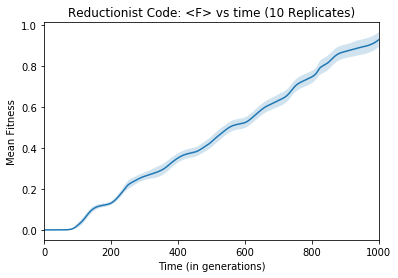

done


In [3]:
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(newTable)
table.plot3d()
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1
N_sims = 10
T_sim = 1000
t_extra = 5
date = '2-22'
code = 'Reductionist Code'
filepath = 'res/2-14 Traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

In [2]:
newTable = utils.standardTable
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(newTable)
bonk = strain(table=tableObj)


In [4]:
utils.standardTable

{'AAA': '*',
 'AAC': '*',
 'AAG': 'K',
 'AAU': 'N',
 'ACA': '*',
 'ACC': '*',
 'ACG': '*',
 'ACU': 'T',
 'AGA': '*',
 'AGC': '*',
 'AGG': '*',
 'AGU': '*',
 'AUA': 'I',
 'AUC': '*',
 'AUG': 'M',
 'AUU': '*',
 'CAA': '*',
 'CAC': '*',
 'CAG': 'Q',
 'CAU': 'H',
 'CCA': '*',
 'CCC': '*',
 'CCG': 'P',
 'CCU': '*',
 'CGA': 'R',
 'CGC': '*',
 'CGG': '*',
 'CGU': '*',
 'CUA': '*',
 'CUC': '*',
 'CUG': '*',
 'CUU': 'L',
 'GAA': 'E',
 'GAC': 'D',
 'GAG': '*',
 'GAU': '*',
 'GCA': '*',
 'GCC': '*',
 'GCG': '*',
 'GCU': 'A',
 'GGA': 'G',
 'GGC': '*',
 'GGG': '*',
 'GGU': '*',
 'GUA': '*',
 'GUC': '*',
 'GUG': 'V',
 'GUU': '*',
 'UAA': '*',
 'UAC': '*',
 'UAG': '*',
 'UAU': 'Y',
 'UCA': 'S',
 'UCC': '*',
 'UCG': '*',
 'UCU': '*',
 'UGA': '*',
 'UGC': '*',
 'UGG': 'W',
 'UGU': 'C',
 'UUA': '*',
 'UUC': 'F',
 'UUG': '*',
 'UUU': '*'}

In [20]:
count_sc = 0
count = 0
max_count = 0 
sc = codonTable().codonDict
table = newTable
mu = 1
# for each codon pair, one mutation separated
for (c1, c2) in utils.tripletMutPairs:
    # increment counters if substitution is nonsynonymous AND
    # neither codon encodes for a STOP
    count_sc += not (
        (sc[c1] == '*' or sc[c2] == '*') or
        (sc[c1] == sc[c2]))
    count += not (
        (table[c1] == '*' or table[c2] == '*') or
        (table[c1] == table[c2]))
    max_count += 1
# adjust mutation rate by ratio of substitutions
mu_adj = mu*(count/count_sc)

In [22]:
sc

{'AAA': '*',
 'AAC': '*',
 'AAG': 'K',
 'AAU': 'N',
 'ACA': '*',
 'ACC': '*',
 'ACG': '*',
 'ACU': 'T',
 'AGA': '*',
 'AGC': '*',
 'AGG': '*',
 'AGU': '*',
 'AUA': 'I',
 'AUC': '*',
 'AUG': 'M',
 'AUU': '*',
 'CAA': '*',
 'CAC': '*',
 'CAG': 'Q',
 'CAU': 'H',
 'CCA': '*',
 'CCC': '*',
 'CCG': 'P',
 'CCU': '*',
 'CGA': 'R',
 'CGC': '*',
 'CGG': '*',
 'CGU': '*',
 'CUA': '*',
 'CUC': '*',
 'CUG': '*',
 'CUU': 'L',
 'GAA': 'E',
 'GAC': 'D',
 'GAG': '*',
 'GAU': '*',
 'GCA': '*',
 'GCC': '*',
 'GCG': '*',
 'GCU': 'A',
 'GGA': 'G',
 'GGC': '*',
 'GGG': '*',
 'GGU': '*',
 'GUA': '*',
 'GUC': '*',
 'GUG': 'V',
 'GUU': '*',
 'UAA': '*',
 'UAC': '*',
 'UAG': '*',
 'UAU': 'Y',
 'UCA': 'S',
 'UCC': '*',
 'UCG': '*',
 'UCU': '*',
 'UGA': '*',
 'UGC': '*',
 'UGG': 'W',
 'UGU': 'C',
 'UUA': '*',
 'UUC': 'F',
 'UUG': '*',
 'UUU': '*'}

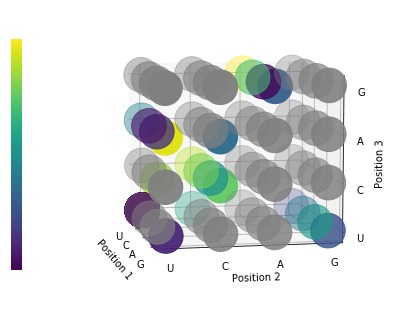

U        C        A        G
U U  UUU : *  UCU : G  UAU : *  UGU : E
  C  UUC : *  UCC : L  UAC : *  UGC : *
  A  UUA : W  UCA : *  UAA : *  UGA : *
  G  UUG : *  UCG : *  UAG : I  UGG : *
C U  CUU : *  CCU : *  CAU : *  CGU : Y
  C  CUC : *  CCC : C  CAC : *  CGC : *
  A  CUA : K  CCA : *  CAA : *  CGA : *
  G  CUG : *  CCG : *  CAG : A  CGG : *
A U  AUU : *  ACU : *  AAU : *  AGU : T
  C  AUC : F  ACC : S  AAC : *  AGC : *
  A  AUA : N  ACA : *  AAA : *  AGA : *
  G  AUG : *  ACG : *  AAG : R  AGG : *
G U  GUU : Q  GCU : *  GAU : *  GGU : D
  C  GUC : *  GCC : M  GAC : *  GGC : *
  A  GUA : V  GCA : P  GAA : *  GGA : *
  G  GUG : *  GCG : *  GAG : H  GGG : *

In [9]:
fftable = codonTable(table=ffgen.triplet())
fftable.plot3d()
fftable.codonTable

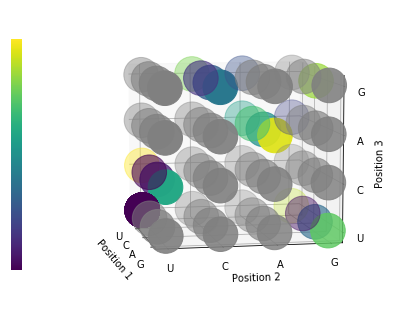

Iteration Number:   5%|▌         | 550/10050 [00:14<04:05, 38.76it/s]


Iteration Number:   8%|▊         | 806/10050 [00:28<05:30, 27.95it/s]


Iteration Number:  10%|█         | 1030/10050 [00:45<06:35, 22.79it/s]


Iteration Number:  16%|█▌        | 1569/10050 [00:58<05:17, 26.68it/s]


Iteration Number:  18%|█▊        | 1814/10050 [01:13<05:33, 24.69it/s]


Iteration Number:  20%|██        | 2034/10050 [01:32<06:05, 21.96it/s]


Iteration Number:  22%|██▏       | 2220/10050 [01:49<06:27, 20.19it/s]


Iteration Number:  27%|██▋       | 2744/10050 [02:02<05:26, 22.34it/s]


Iteration Number:  31%|███       | 3093/10050 [02:17<05:08, 22.53it/s]


Iteration Number:  33%|███▎      | 3322/10050 [02:30<05:05, 22.04it/s]


Iteration Number:  36%|███▌      | 3642/10050 [02:44<04:48, 22.18it/s]


Iteration Number:  41%|████      | 4077/10050 [02:58<04:21, 22.87it/s]


Iteration Number:  43%|████▎     | 4307/10050 [03:12<04:16, 22.39it/s]


Iteration Number:  45%|████▌     | 4535/10050 [03:26<04:10, 21.98it/s]


Iteration Number:  50%|████▉     | 5014/10050 [03:39<03:40, 22.86it/s]


Iteration Number:  53%|█████▎    | 5368/10050 [03:53<03:23, 23.00it/s]


Iteration Number:  56%|█████▋    | 5671/10050 [04:08<03:11, 22.85it/s]


Iteration Number:  60%|██████    | 6074/10050 [04:21<02:51, 23.24it/s]


Iteration Number:  64%|██████▍   | 6482/10050 [04:34<02:31, 23.58it/s]


Iteration Number:  67%|██████▋   | 6763/10050 [04:49<02:20, 23.39it/s]


Iteration Number:  72%|███████▏  | 7196/10050 [05:02<02:00, 23.78it/s]


Iteration Number:  77%|███████▋  | 7713/10050 [05:15<01:35, 24.46it/s]


Iteration Number:  80%|████████  | 8063/10050 [05:29<01:21, 24.46it/s]


Iteration Number:  84%|████████▍ | 8417/10050 [05:42<01:06, 24.59it/s]


Iteration Number:  88%|████████▊ | 8829/10050 [05:54<00:49, 24.88it/s]


Iteration Number:  93%|█████████▎| 9312/10050 [06:08<00:29, 25.27it/s]


Iteration Number:  95%|█████████▍| 9533/10050 [06:25<00:20, 24.74it/s]


Iteration Number:  97%|█████████▋| 9753/10050 [06:44<00:12, 24.12it/s]


Iteration Number: 100%|█████████▉| 10047/10050 [06:58<00:00, 24.02it/s]


Iteration Number:   5%|▌         | 532/10050 [00:14<04:16, 37.15it/s]


Iteration Number:   8%|▊         | 756/10050 [00:33<06:56, 22.30it/s]


Iteration Number:  10%|▉         | 995/10050 [00:49<07:31, 20.04it/s]


Iteration Number:  16%|█▌        | 1613/10050 [01:03<05:31, 25.48it/s]


Iteration Number:  18%|█▊        | 1846/10050 [01:17<05:45, 23.74it/s]


Iteration Number:  21%|██        | 2066/10050 [01:32<05:57, 22.36it/s]


Iteration Number:  25%|██▍       | 2472/10050 [01:45<05:23, 23.44it/s]


Iteration Number:  31%|███▏      | 3145/10050 [01:58<04:19, 26.64it/s]


Iteration Number:  34%|███▍      | 3437/10050 [02:11<04:13, 26.10it/s]


Iteration Number:  36%|███▋      | 3664/10050 [02:24<04:12, 25.32it/s]


Iteration Number:  42%|████▏     | 4224/10050 [02:37<03:37, 26.82it/s]


Iteration Number:  46%|████▌     | 4610/10050 [02:50<03:21, 27.03it/s]


Iteration Number:  51%|█████     | 5144/10050 [03:04<02:55, 27.89it/s]


Iteration Number:  53%|█████▎    | 5368/10050 [03:18<02:53, 27.06it/s]


Iteration Number:  59%|█████▊    | 5885/10050 [03:32<02:30, 27.75it/s]


Iteration Number:  61%|██████▏   | 6165/10050 [03:46<02:22, 27.19it/s]


Iteration Number:  63%|██████▎   | 6367/10050 [04:05<02:22, 25.93it/s]


Iteration Number:  66%|██████▌   | 6587/10050 [04:24<02:19, 24.90it/s]


Iteration Number:  70%|███████   | 7059/10050 [04:38<01:57, 25.38it/s]


Iteration Number:  73%|███████▎  | 7351/10050 [04:51<01:47, 25.18it/s]


Iteration Number:  75%|███████▌  | 7571/10050 [05:07<01:40, 24.65it/s]


Iteration Number:  78%|███████▊  | 7844/10050 [05:21<01:30, 24.40it/s]


Iteration Number:  83%|████████▎ | 8354/10050 [05:34<01:07, 24.95it/s]


Iteration Number:  86%|████████▋ | 8685/10050 [05:48<00:54, 24.93it/s]


Iteration Number:  92%|█████████▏| 9234/10050 [06:00<00:31, 25.58it/s]


Iteration Number:  97%|█████████▋| 9735/10050 [06:14<00:12, 25.99it/s]


Iteration Number:   1%|▏         | 141/10050 [00:00<00:42, 233.35it/s]


Iteration Number:   6%|▌         | 612/10050 [00:14<03:43, 42.31it/s]


Iteration Number:   8%|▊         | 836/10050 [00:29<05:20, 28.73it/s]


Iteration Number:  13%|█▎        | 1343/10050 [00:42<04:36, 31.51it/s]


Iteration Number:  17%|█▋        | 1728/10050 [00:56<04:31, 30.68it/s]


Iteration Number:  20%|██        | 2018/10050 [01:09<04:36, 29.08it/s]


Iteration Number:  25%|██▌       | 2520/10050 [01:22<04:06, 30.59it/s]


Iteration Number:  28%|██▊       | 2831/10050 [01:35<04:03, 29.60it/s]


Iteration Number:  34%|███▍      | 3400/10050 [01:48<03:31, 31.39it/s]


Iteration Number:  36%|███▋      | 3656/10050 [02:01<03:32, 30.03it/s]


Iteration Number:  39%|███▊      | 3881/10050 [02:15<03:35, 28.63it/s]


Iteration Number:  41%|████      | 4101/10050 [02:32<03:40, 26.96it/s]


Iteration Number:  43%|████▎     | 4321/10050 [02:48<03:42, 25.69it/s]


Iteration Number:  48%|████▊     | 4841/10050 [03:00<03:14, 26.78it/s]


Iteration Number:  53%|█████▎    | 5311/10050 [03:13<02:52, 27.41it/s]


Iteration Number:  59%|█████▉    | 5951/10050 [03:26<02:22, 28.77it/s]


Iteration Number:  61%|██████▏   | 6180/10050 [03:43<02:19, 27.69it/s]


Iteration Number:  64%|██████▎   | 6400/10050 [04:02<02:18, 26.36it/s]


Iteration Number:  67%|██████▋   | 6690/10050 [04:19<02:10, 25.82it/s]


Iteration Number:  72%|███████▏  | 7272/10050 [04:32<01:44, 26.71it/s]


Iteration Number:  75%|███████▌  | 7553/10050 [04:46<01:34, 26.41it/s]


Iteration Number:  81%|████████  | 8129/10050 [04:59<01:10, 27.18it/s]


Iteration Number:  85%|████████▍ | 8526/10050 [05:13<00:56, 27.21it/s]


Iteration Number:  88%|████████▊ | 8852/10050 [05:28<00:44, 26.99it/s]


Iteration Number:  93%|█████████▎| 9350/10050 [05:41<00:25, 27.37it/s]


Iteration Number:  96%|█████████▋| 9675/10050 [05:54<00:13, 27.29it/s]


Iteration Number:   4%|▍         | 389/10050 [00:05<02:26, 65.75it/s]


Iteration Number:   7%|▋         | 736/10050 [00:20<04:17, 36.11it/s]


Iteration Number:  10%|▉         | 961/10050 [00:33<05:18, 28.56it/s]


Iteration Number:  12%|█▏        | 1181/10050 [00:48<06:03, 24.38it/s]


Iteration Number:  16%|█▌        | 1608/10050 [01:01<05:21, 26.30it/s]


Iteration Number:  22%|██▏       | 2162/10050 [01:14<04:30, 29.19it/s]


Iteration Number:  24%|██▍       | 2421/10050 [01:27<04:36, 27.56it/s]


Iteration Number:  26%|██▋       | 2641/10050 [01:45<04:56, 25.02it/s]


Iteration Number:  28%|██▊       | 2861/10050 [02:01<05:05, 23.51it/s]


Iteration Number:  31%|███       | 3081/10050 [02:15<05:06, 22.73it/s]


Iteration Number:  35%|███▍      | 3484/10050 [02:28<04:39, 23.47it/s]


Iteration Number:  40%|███▉      | 3997/10050 [02:40<04:03, 24.83it/s]


Iteration Number:  44%|████▎     | 4381/10050 [02:54<03:45, 25.09it/s]


Iteration Number:  46%|████▌     | 4643/10050 [03:08<03:39, 24.68it/s]


Iteration Number:  49%|████▉     | 4949/10050 [03:21<03:28, 24.51it/s]


Iteration Number:  55%|█████▍    | 5483/10050 [03:34<02:58, 25.53it/s]


Iteration Number:  58%|█████▊    | 5826/10050 [03:49<02:46, 25.38it/s]


Iteration Number:  61%|██████▏   | 6159/10050 [04:03<02:33, 25.32it/s]


Iteration Number:  64%|██████▎   | 6394/10050 [04:16<02:26, 24.88it/s]


Iteration Number:  67%|██████▋   | 6782/10050 [04:29<02:10, 25.12it/s]


Iteration Number:  72%|███████▏  | 7240/10050 [04:42<01:49, 25.59it/s]


Iteration Number:  77%|███████▋  | 7710/10050 [04:55<01:29, 26.06it/s]


Iteration Number:  80%|███████▉  | 7999/10050 [05:09<01:19, 25.84it/s]


Iteration Number:  84%|████████▍ | 8470/10050 [05:22<01:00, 26.28it/s]


Iteration Number:  88%|████████▊ | 8831/10050 [05:35<00:46, 26.31it/s]


Iteration Number:  92%|█████████▏| 9239/10050 [05:48<00:30, 26.47it/s]


Iteration Number:  96%|█████████▋| 9680/10050 [06:01<00:13, 26.75it/s]


Iteration Number:   3%|▎         | 312/10050 [00:04<02:18, 70.26it/s]


Iteration Number:   6%|▌         | 566/10050 [00:19<05:22, 29.45it/s]


Iteration Number:   8%|▊         | 790/10050 [00:36<07:06, 21.71it/s]


Iteration Number:  12%|█▏        | 1184/10050 [00:50<06:15, 23.59it/s]


Iteration Number:  18%|█▊        | 1831/10050 [01:04<04:48, 28.52it/s]


Iteration Number:  20%|██        | 2055/10050 [01:17<05:02, 26.47it/s]


Iteration Number:  23%|██▎       | 2275/10050 [01:33<05:20, 24.22it/s]


Iteration Number:  26%|██▌       | 2603/10050 [01:48<05:09, 24.04it/s]


Iteration Number:  30%|███       | 3045/10050 [02:02<04:41, 24.91it/s]


Iteration Number:  32%|███▏      | 3265/10050 [02:18<04:48, 23.53it/s]


Iteration Number:  35%|███▍      | 3485/10050 [02:35<04:52, 22.45it/s]


Iteration Number:  39%|███▊      | 3870/10050 [02:48<04:29, 22.97it/s]


Iteration Number:  43%|████▎     | 4286/10050 [03:02<04:04, 23.54it/s]


Iteration Number:  46%|████▌     | 4638/10050 [03:15<03:47, 23.75it/s]


Iteration Number:  50%|████▉     | 5018/10050 [03:28<03:29, 24.04it/s]


Iteration Number:  52%|█████▏    | 5257/10050 [03:42<03:22, 23.63it/s]


Iteration Number:  55%|█████▍    | 5478/10050 [03:56<03:17, 23.21it/s]


Iteration Number:  60%|█████▉    | 5980/10050 [04:09<02:49, 23.99it/s]


Iteration Number:  63%|██████▎   | 6297/10050 [04:23<02:36, 23.93it/s]


Iteration Number:  65%|██████▍   | 6518/10050 [04:36<02:29, 23.59it/s]


Iteration Number:  67%|██████▋   | 6741/10050 [04:49<02:22, 23.30it/s]


Iteration Number:  71%|███████   | 7133/10050 [05:02<02:03, 23.60it/s]


Iteration Number:  75%|███████▌  | 7542/10050 [05:15<01:44, 23.89it/s]


Iteration Number:  78%|███████▊  | 7805/10050 [05:29<01:34, 23.66it/s]


Iteration Number:  81%|████████▏ | 8170/10050 [05:43<01:19, 23.79it/s]


Iteration Number:  86%|████████▌ | 8657/10050 [05:56<00:57, 24.29it/s]


Iteration Number:  90%|████████▉ | 9022/10050 [06:09<00:42, 24.39it/s]


Iteration Number:  93%|█████████▎| 9381/10050 [06:23<00:27, 24.47it/s]


Iteration Number:  98%|█████████▊| 9860/10050 [06:36<00:07, 24.89it/s]


Iteration Number:   5%|▍         | 496/10050 [00:10<03:12, 49.56it/s]


Iteration Number:   8%|▊         | 832/10050 [00:24<04:30, 34.09it/s]


Iteration Number:  15%|█▍        | 1488/10050 [00:37<03:36, 39.59it/s]


Iteration Number:  17%|█▋        | 1736/10050 [00:51<04:08, 33.44it/s]


Iteration Number:  19%|█▉        | 1957/10050 [01:07<04:38, 29.06it/s]


Iteration Number:  24%|██▍       | 2447/10050 [01:20<04:09, 30.51it/s]


Iteration Number:  27%|██▋       | 2711/10050 [01:33<04:14, 28.89it/s]


Iteration Number:  29%|██▉       | 2931/10050 [01:48<04:23, 27.02it/s]


Iteration Number:  32%|███▏      | 3193/10050 [02:01<04:21, 26.17it/s]


Iteration Number:  37%|███▋      | 3761/10050 [02:14<03:44, 27.97it/s]


Iteration Number:  43%|████▎     | 4354/10050 [02:27<03:12, 29.57it/s]


Iteration Number:  46%|████▌     | 4618/10050 [02:40<03:08, 28.76it/s]


Iteration Number:  48%|████▊     | 4838/10050 [02:55<03:08, 27.62it/s]


Iteration Number:  53%|█████▎    | 5360/10050 [03:08<02:44, 28.47it/s]


Iteration Number:  56%|█████▌    | 5602/10050 [03:23<02:41, 27.55it/s]


Iteration Number:  57%|█████▋    | 5754/10050 [03:38<02:43, 26.29it/s]


Iteration Number:  58%|█████▊    | 5864/10050 [03:52<02:46, 25.21it/s]


Iteration Number:  59%|█████▉    | 5974/10050 [04:08<02:49, 24.07it/s]


Iteration Number:  61%|██████    | 6106/10050 [04:23<02:50, 23.18it/s]


Iteration Number:  66%|██████▌   | 6605/10050 [04:36<02:24, 23.88it/s]


Iteration Number:  69%|██████▉   | 6948/10050 [04:49<02:09, 24.01it/s]


Iteration Number:  74%|███████▍  | 7417/10050 [05:02<01:47, 24.55it/s]


Iteration Number:  78%|███████▊  | 7805/10050 [05:15<01:30, 24.73it/s]


Iteration Number:  84%|████████▎ | 8395/10050 [05:29<01:04, 25.50it/s]


Iteration Number:  86%|████████▌ | 8661/10050 [05:43<00:55, 25.20it/s]


Iteration Number:  91%|█████████ | 9129/10050 [05:56<00:36, 25.58it/s]


Iteration Number:  94%|█████████▍| 9473/10050 [06:10<00:22, 25.55it/s]


Iteration Number:  98%|█████████▊| 9823/10050 [06:24<00:08, 25.56it/s]


Iteration Number:   5%|▍         | 483/10050 [00:08<02:54, 54.85it/s]


Iteration Number:   7%|▋         | 727/10050 [00:22<04:48, 32.36it/s]


Iteration Number:  13%|█▎        | 1343/10050 [00:35<03:52, 37.41it/s]


Iteration Number:  16%|█▋        | 1643/10050 [00:50<04:16, 32.77it/s]


Iteration Number:  19%|█▉        | 1905/10050 [01:03<04:32, 29.90it/s]


Iteration Number:  24%|██▍       | 2428/10050 [01:17<04:01, 31.53it/s]


Iteration Number:  27%|██▋       | 2691/10050 [01:30<04:08, 29.61it/s]


Iteration Number:  32%|███▏      | 3210/10050 [01:44<03:41, 30.83it/s]


Iteration Number:  35%|███▌      | 3564/10050 [01:58<03:35, 30.14it/s]


Iteration Number:  38%|███▊      | 3835/10050 [02:12<03:34, 28.98it/s]


Iteration Number:  44%|████▍     | 4453/10050 [02:25<03:02, 30.71it/s]


Iteration Number:  50%|█████     | 5027/10050 [02:38<02:38, 31.79it/s]


Iteration Number:  56%|█████▋    | 5673/10050 [02:51<02:12, 33.13it/s]


Iteration Number:  59%|█████▉    | 5952/10050 [03:05<02:07, 32.12it/s]


Iteration Number:  65%|██████▌   | 6533/10050 [03:18<01:46, 32.96it/s]


Iteration Number:  69%|██████▊   | 6886/10050 [03:32<01:37, 32.46it/s]


Iteration Number:  72%|███████▏  | 7197/10050 [03:46<01:29, 31.73it/s]


Iteration Number:  76%|███████▌  | 7606/10050 [03:59<01:17, 31.73it/s]


Iteration Number:  80%|███████▉  | 7999/10050 [04:13<01:04, 31.61it/s]


Iteration Number:  85%|████████▍ | 8539/10050 [04:25<00:47, 32.13it/s]


Iteration Number:  88%|████████▊ | 8867/10050 [04:39<00:37, 31.75it/s]


Iteration Number:  90%|█████████ | 9087/10050 [04:53<00:31, 30.99it/s]


Iteration Number:  93%|█████████▎| 9308/10050 [05:08<00:24, 30.21it/s]


Iteration Number:  96%|█████████▌| 9612/10050 [05:21<00:14, 29.87it/s]


Iteration Number:   2%|▏         | 236/10050 [00:01<01:21, 120.82it/s]


Iteration Number:   6%|▌         | 594/10050 [00:16<04:19, 36.40it/s]


Iteration Number:   8%|▊         | 818/10050 [00:31<06:00, 25.59it/s]


Iteration Number:  14%|█▎        | 1360/10050 [00:45<04:52, 29.72it/s]


Iteration Number:  16%|█▌        | 1617/10050 [00:59<05:11, 27.10it/s]


Iteration Number:  19%|█▉        | 1917/10050 [01:13<05:10, 26.21it/s]


Iteration Number:  25%|██▍       | 2463/10050 [01:26<04:24, 28.63it/s]


Iteration Number:  27%|██▋       | 2733/10050 [01:39<04:26, 27.41it/s]


Iteration Number:  33%|███▎      | 3267/10050 [01:52<03:53, 29.10it/s]


Iteration Number:  38%|███▊      | 3860/10050 [02:05<03:21, 30.72it/s]


Iteration Number:  44%|████▍     | 4409/10050 [02:18<02:57, 31.73it/s]


Iteration Number:  47%|████▋     | 4733/10050 [02:33<02:52, 30.88it/s]


Iteration Number:  52%|█████▏    | 5205/10050 [02:46<02:34, 31.31it/s]


Iteration Number:  55%|█████▍    | 5519/10050 [03:00<02:27, 30.65it/s]


Iteration Number:  58%|█████▊    | 5874/10050 [03:13<02:17, 30.38it/s]


Iteration Number:  61%|██████    | 6136/10050 [03:27<02:12, 29.60it/s]


Iteration Number:  63%|██████▎   | 6360/10050 [03:41<02:08, 28.74it/s]


Iteration Number:  66%|██████▋   | 6678/10050 [03:54<01:58, 28.45it/s]


Iteration Number:  70%|██████▉   | 7021/10050 [04:07<01:46, 28.37it/s]


Iteration Number:  74%|███████▍  | 7437/10050 [04:20<01:31, 28.56it/s]


Iteration Number:  77%|███████▋  | 7731/10050 [04:34<01:22, 28.14it/s]


Iteration Number:  81%|████████  | 8165/10050 [04:47<01:06, 28.40it/s]


Iteration Number:  85%|████████▌ | 8548/10050 [05:01<00:52, 28.37it/s]


Iteration Number:  88%|████████▊ | 8803/10050 [05:15<00:44, 27.93it/s]


Iteration Number:  93%|█████████▎| 9344/10050 [05:27<00:24, 28.50it/s]


Iteration Number:  97%|█████████▋| 9783/10050 [05:40<00:09, 28.72it/s]


Iteration Number:   2%|▏         | 213/10050 [00:01<01:14, 132.81it/s]


Iteration Number:   6%|▌         | 586/10050 [00:16<04:26, 35.48it/s]


Iteration Number:   8%|▊         | 816/10050 [00:31<05:51, 26.24it/s]


Iteration Number:  11%|█         | 1128/10050 [00:45<05:57, 24.94it/s]


Iteration Number:  17%|█▋        | 1721/10050 [00:57<04:40, 29.74it/s]


Iteration Number:  21%|██        | 2098/10050 [01:11<04:30, 29.37it/s]


Iteration Number:  27%|██▋       | 2684/10050 [01:24<03:51, 31.80it/s]


Iteration Number:  30%|███       | 3037/10050 [01:38<03:46, 30.94it/s]


Iteration Number:  32%|███▏      | 3257/10050 [01:51<03:53, 29.14it/s]


Iteration Number:  35%|███▌      | 3522/10050 [02:06<03:53, 27.92it/s]


Iteration Number:  41%|████      | 4091/10050 [02:19<03:23, 29.28it/s]


Iteration Number:  43%|████▎     | 4314/10050 [02:34<03:26, 27.84it/s]


Iteration Number:  47%|████▋     | 4724/10050 [02:48<03:09, 28.11it/s]


Iteration Number:  54%|█████▎    | 5383/10050 [03:00<02:36, 29.77it/s]


Iteration Number:  58%|█████▊    | 5841/10050 [03:13<02:19, 30.13it/s]


Iteration Number:  62%|██████▏   | 6251/10050 [03:27<02:06, 30.10it/s]


Iteration Number:  64%|██████▍   | 6478/10050 [03:42<02:02, 29.08it/s]


Iteration Number:  66%|██████▋   | 6667/10050 [03:59<02:01, 27.82it/s]


Iteration Number:  68%|██████▊   | 6848/10050 [04:16<01:59, 26.73it/s]


Iteration Number:  72%|███████▏  | 7221/10050 [04:29<01:45, 26.81it/s]


Iteration Number:  76%|███████▌  | 7589/10050 [04:42<01:31, 26.84it/s]


Iteration Number:  79%|███████▊  | 7903/10050 [04:57<01:20, 26.58it/s]


Iteration Number:  84%|████████▍ | 8451/10050 [05:10<00:58, 27.20it/s]


Iteration Number:  90%|█████████ | 9061/10050 [05:23<00:35, 28.01it/s]


Iteration Number:  93%|█████████▎| 9360/10050 [05:37<00:24, 27.73it/s]


Iteration Number:  99%|█████████▊| 9911/10050 [05:50<00:04, 28.24it/s]


Iteration Number:   4%|▎         | 355/10050 [00:05<02:32, 63.41it/s]


Iteration Number:   6%|▌         | 627/10050 [00:20<05:13, 30.09it/s]


Iteration Number:   8%|▊         | 851/10050 [00:39<07:04, 21.67it/s]


Iteration Number:  11%|█         | 1073/10050 [00:57<08:03, 18.56it/s]


Iteration Number:  13%|█▎        | 1300/10050 [01:13<08:17, 17.60it/s]


Iteration Number:  18%|█▊        | 1833/10050 [01:27<06:30, 21.06it/s]


Iteration Number:  21%|██        | 2069/10050 [01:40<06:28, 20.56it/s]


Iteration Number:  23%|██▎       | 2289/10050 [01:55<06:32, 19.79it/s]


Iteration Number:  25%|██▍       | 2509/10050 [02:12<06:38, 18.92it/s]


Iteration Number:  28%|██▊       | 2858/10050 [02:26<06:07, 19.57it/s]


Iteration Number:  33%|███▎      | 3302/10050 [02:39<05:25, 20.73it/s]


Iteration Number:  36%|███▌      | 3620/10050 [02:53<05:07, 20.90it/s]


Iteration Number:  42%|████▏     | 4178/10050 [03:06<04:21, 22.46it/s]


Iteration Number:  45%|████▍     | 4489/10050 [03:19<04:07, 22.48it/s]


Iteration Number:  50%|█████     | 5067/10050 [03:32<03:29, 23.83it/s]


Iteration Number:  53%|█████▎    | 5336/10050 [03:46<03:20, 23.57it/s]


Iteration Number:  58%|█████▊    | 5842/10050 [03:59<02:52, 24.40it/s]


Iteration Number:  61%|██████▏   | 6174/10050 [04:13<02:39, 24.36it/s]


Iteration Number:  64%|██████▍   | 6461/10050 [04:27<02:28, 24.14it/s]


Iteration Number:  70%|███████   | 7059/10050 [04:40<01:58, 25.16it/s]


Iteration Number:  73%|███████▎  | 7383/10050 [04:54<01:46, 25.05it/s]


Iteration Number:  79%|███████▉  | 7946/10050 [05:07<01:21, 25.83it/s]


Iteration Number:  82%|████████▏ | 8237/10050 [05:21<01:10, 25.66it/s]


Iteration Number:  84%|████████▍ | 8457/10050 [05:37<01:03, 25.07it/s]


Iteration Number:  87%|████████▋ | 8784/10050 [05:51<00:50, 24.99it/s]


Iteration Number:  92%|█████████▏| 9240/10050 [06:05<00:32, 25.29it/s]


Iteration Number:  94%|█████████▍| 9460/10050 [06:18<00:23, 24.99it/s]


Iteration Number: 100%|█████████▉| 10036/10050 [06:31<00:00, 25.63it/s]


Simulation Number: 100%|██████████| 10/10 [1:02:44<00:00, 376.50s/it]s]
/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


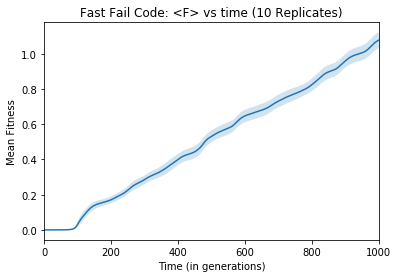

done


In [4]:
failTable = codonTable(table=ffgen.triplet())
failTable.plot3d()
# initialize some variables
T_curr = 0
mut_param = [1,2]
dt = 0.1
N_sims = 10
T_sim = 1000
t_extra = 5
date = '2-22'
code = 'Fast Fail Code'
filepath = 'res/2-14 Traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=failTable, fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# pickle results
with open('{0}/{1}'.format(filepath, filename), 'wb') as handle:
    pickle.dump(df_sc, handle)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')

In [7]:
with open('res/2-14 Traces/2-22_Standard Code_favg_traces_T=1000_N=10_b=1_l=2.pickle', 'rb') as handle:
    standard_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Fast Fail Code_favg_traces_T=1000_N=10_b=1_l=2.pickle', 'rb') as handle:
    fastfail_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-22_Reductionist Code_favg_traces_T=1000_N=10_b=1_l=2.pickle', 'rb') as handle:
    reductionist_df = pickle.load(handle)

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


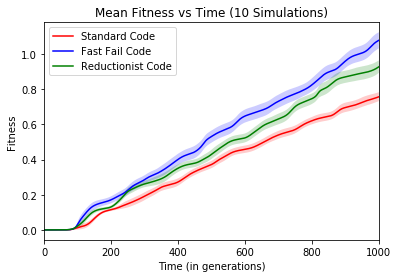

In [8]:
ax1 = sns.tsplot(data=standard_df, time='time', value='value', unit='sim', condition='code', color='red')
ax2 = sns.tsplot(data=fastfail_df, time='time', value='value', unit='sim', condition='code', color='blue')
ax3 = sns.tsplot(data=reductionist_df, time='time', value='value', unit='sim', condition='code', color='green')
plt.legend()
plt.title('Mean Fitness vs Time (10 Simulations)')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness')
plt.savefig('res/2-22_F_avg_T=1000_b=2_l=3-5.pdf', bbox_inches='tight')
plt.show()

In [10]:
with open('reductiondict.pickle', 'rb') as handle:
    reductiondict = pickle.load(handle)

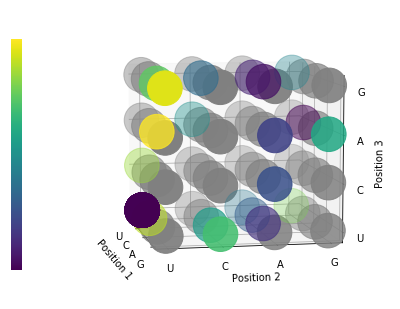

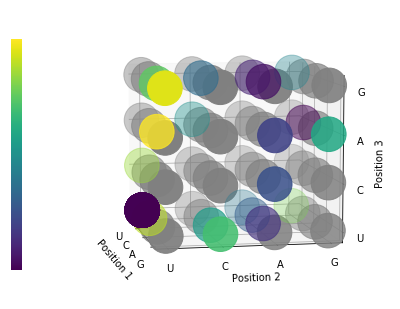

In [14]:
reductionTable = codonTable(reductiondict)
reductionTable.plot3d()